# Statistical Modeling Woche 7

In [132]:
import pandas as pd
import numpy as np

In [133]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Überblick über den Datensatz `Carseats`

Der `Carseats`-Datensatz stammt aus dem Buch *"An Introduction to Statistical Learning"* und simuliert Verkaufszahlen von Kindersitzen in verschiedenen Filialen. Jede Zeile beschreibt eine Filiale mit Informationen zur Umgebung und den Verkaufsbedingungen.

In [134]:
carseats = pd.read_csv('Carseats.csv')

In [144]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Beschreibung der Variablen

| Variable        | Beschreibung                                                              |
|-----------------|---------------------------------------------------------------------------|
| `Sales`         | Verkaufszahlen in Tausend Stück – **Zielvariable**                        |
| `CompPrice`     | Preis des Konkurrenten in der Nähe                                        |
| `Income`        | Durchschnittliches Einkommen in der Region (in Tausend USD)              |
| `Advertising`   | Werbebudget (in Tausend USD)                                              |
| `Population`    | Bevölkerungszahl in der Region                                            |
| `Price`         | Preis des Produkts in dieser Filiale                                      |
| `ShelveLoc`     | Qualität des Regalplatzes (`Bad`, `Medium`, `Good`) – **kategorisch**     |
| `Age`           | Durchschnittsalter der Bevölkerung in der Region                          |
| `Education`     | Durchschnittliche Schulbildung (in Jahren)                                |
| `Urban`         | Liegt die Filiale in einem städtischen Gebiet? (`Yes`/`No`) – **kategorisch** |
| `US`            | Liegt die Filiale in den USA? (`Yes`/`No`) – **kategorisch**              |

## Variablentypen

- **Numerisch**: `Sales`, `CompPrice`, `Income`, `Advertising`, `Population`, `Price`, `Age`, `Education`
- **Kategorisch**: `ShelveLoc`, `Urban`, `US`

## Mögliche Analysen

- Vorhersage von `Sales` mit Hilfe linearer Regression
- Klassifikation in hohe vs. niedrige Verkäufe (z. B. mit Entscheidungsbäumen) --> Nächstes Semester
- Untersuchung wichtiger Einflussfaktoren wie:
  - Preisgestaltung (`Price`, `CompPrice`)
  - Werbebudget (`Advertising`)
  - Regalplatzierung (`ShelveLoc`)

# Explorative Analyse

Ziel ist es, erste Zusammenhänge im Carseats-Datensatz zu erkennen und ein besseres Verständnis für die wichtigsten Einflussfaktoren auf die Verkaufszahlen (`Sales`) zu gewinnen.

Dazu analysieren wir:
- die Verteilung der Zielgröße,
- Korrelationen zwischen numerischen Variablen,
- gruppierte Unterschiede bei kategorialen Variablen,
- und bereiten den Datensatz für ein erstes Regressionsmodell vor.

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

## Überblick über die Struktur des Datensatzes

Wir verschaffen uns einen ersten Überblick über Variablen, Datentypen und mögliche fehlende Werte.

In [143]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Qualitative Prädiktoren (für später)

In [138]:
carseats_encoded = carseats.copy()

In [139]:
dummies = pd.get_dummies(carseats_encoded[['US', 'Urban']], drop_first=True)

In [141]:
shelve_map = {'Bad': 1, 'Medium': 2, 'Good': 3}
carseats_encoded['ShelveLoc'] = carseats_encoded['ShelveLoc'].map(shelve_map)

In [ ]:
carseats_encoded = pd.concat([carseats_encoded.drop(columns=['US', 'Urban']), dummies], axis=1)

## Daten untersuchen

In [114]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [115]:
# Anzahl fehlender Werte pro Spalte
carseats.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Verteilung der Zielgröße `Sales`

Wir betrachten die Verteilung der Verkaufszahlen über alle Filialen hinweg.

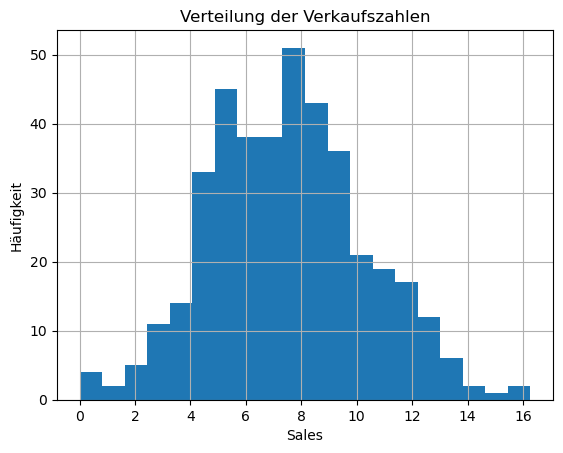

In [116]:
carseats['Sales'].hist(bins=20)
plt.title('Verteilung der Verkaufszahlen')
plt.xlabel('Sales')
plt.ylabel('Häufigkeit')
plt.show()

## Korrelationen zwischen numerischen Variablen

Mit einem Pairplot und einer Heatmap erkennen wir erste Zusammenhänge zwischen den numerischen Variablen.

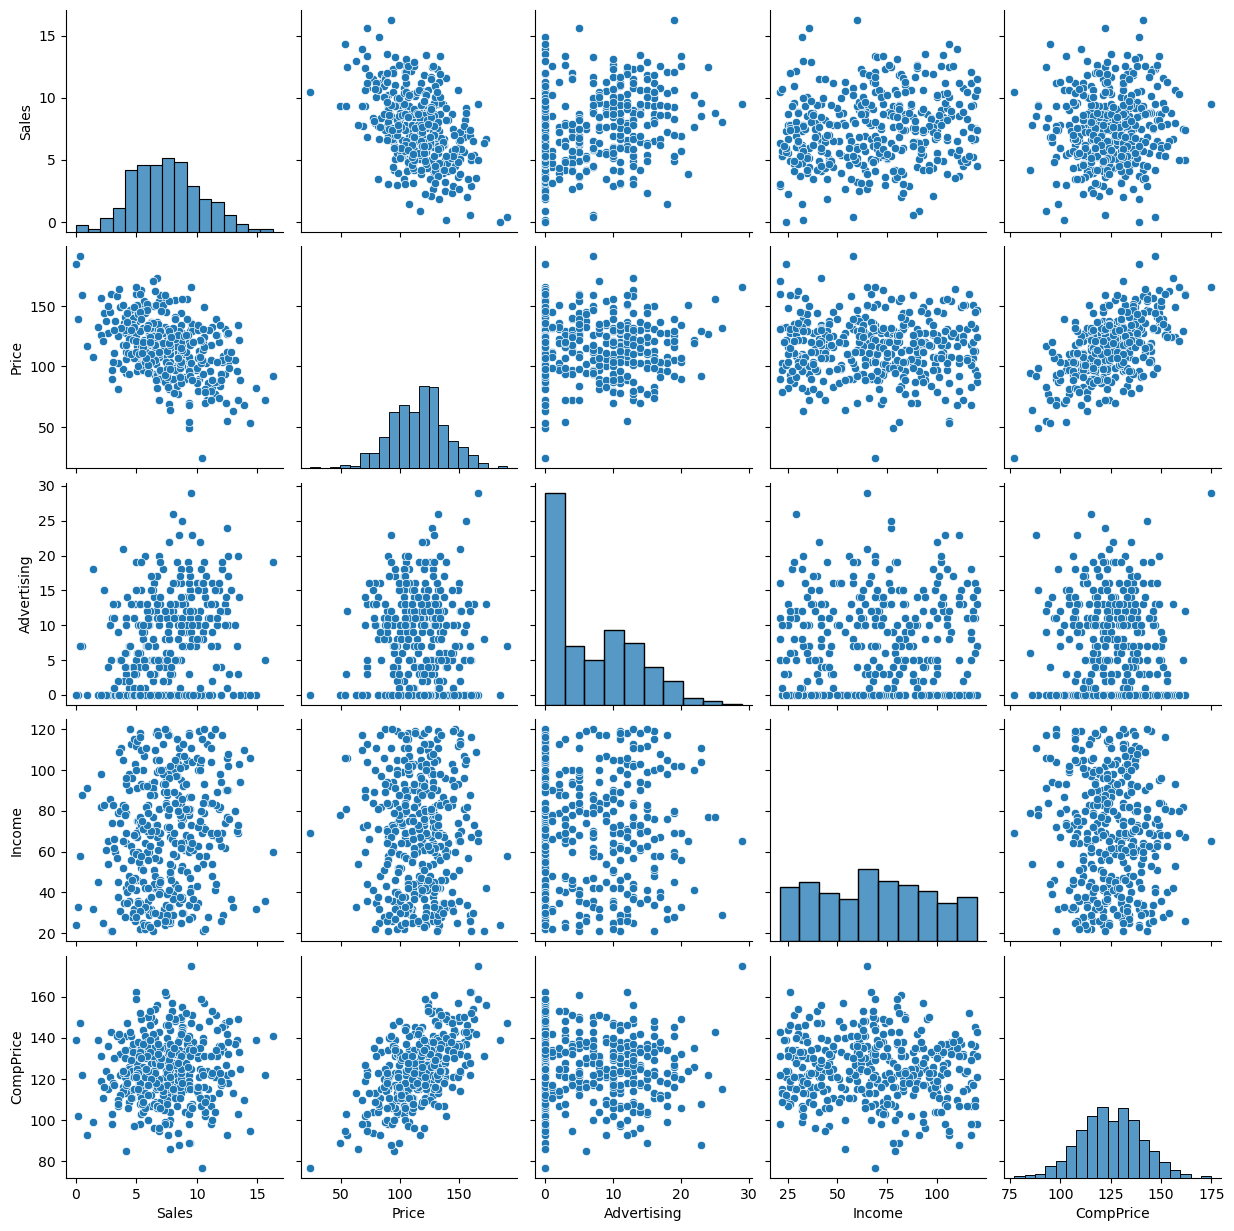

In [117]:
sns.pairplot(carseats[['Sales', 'Price', 'Advertising', 'Income', 'CompPrice']])

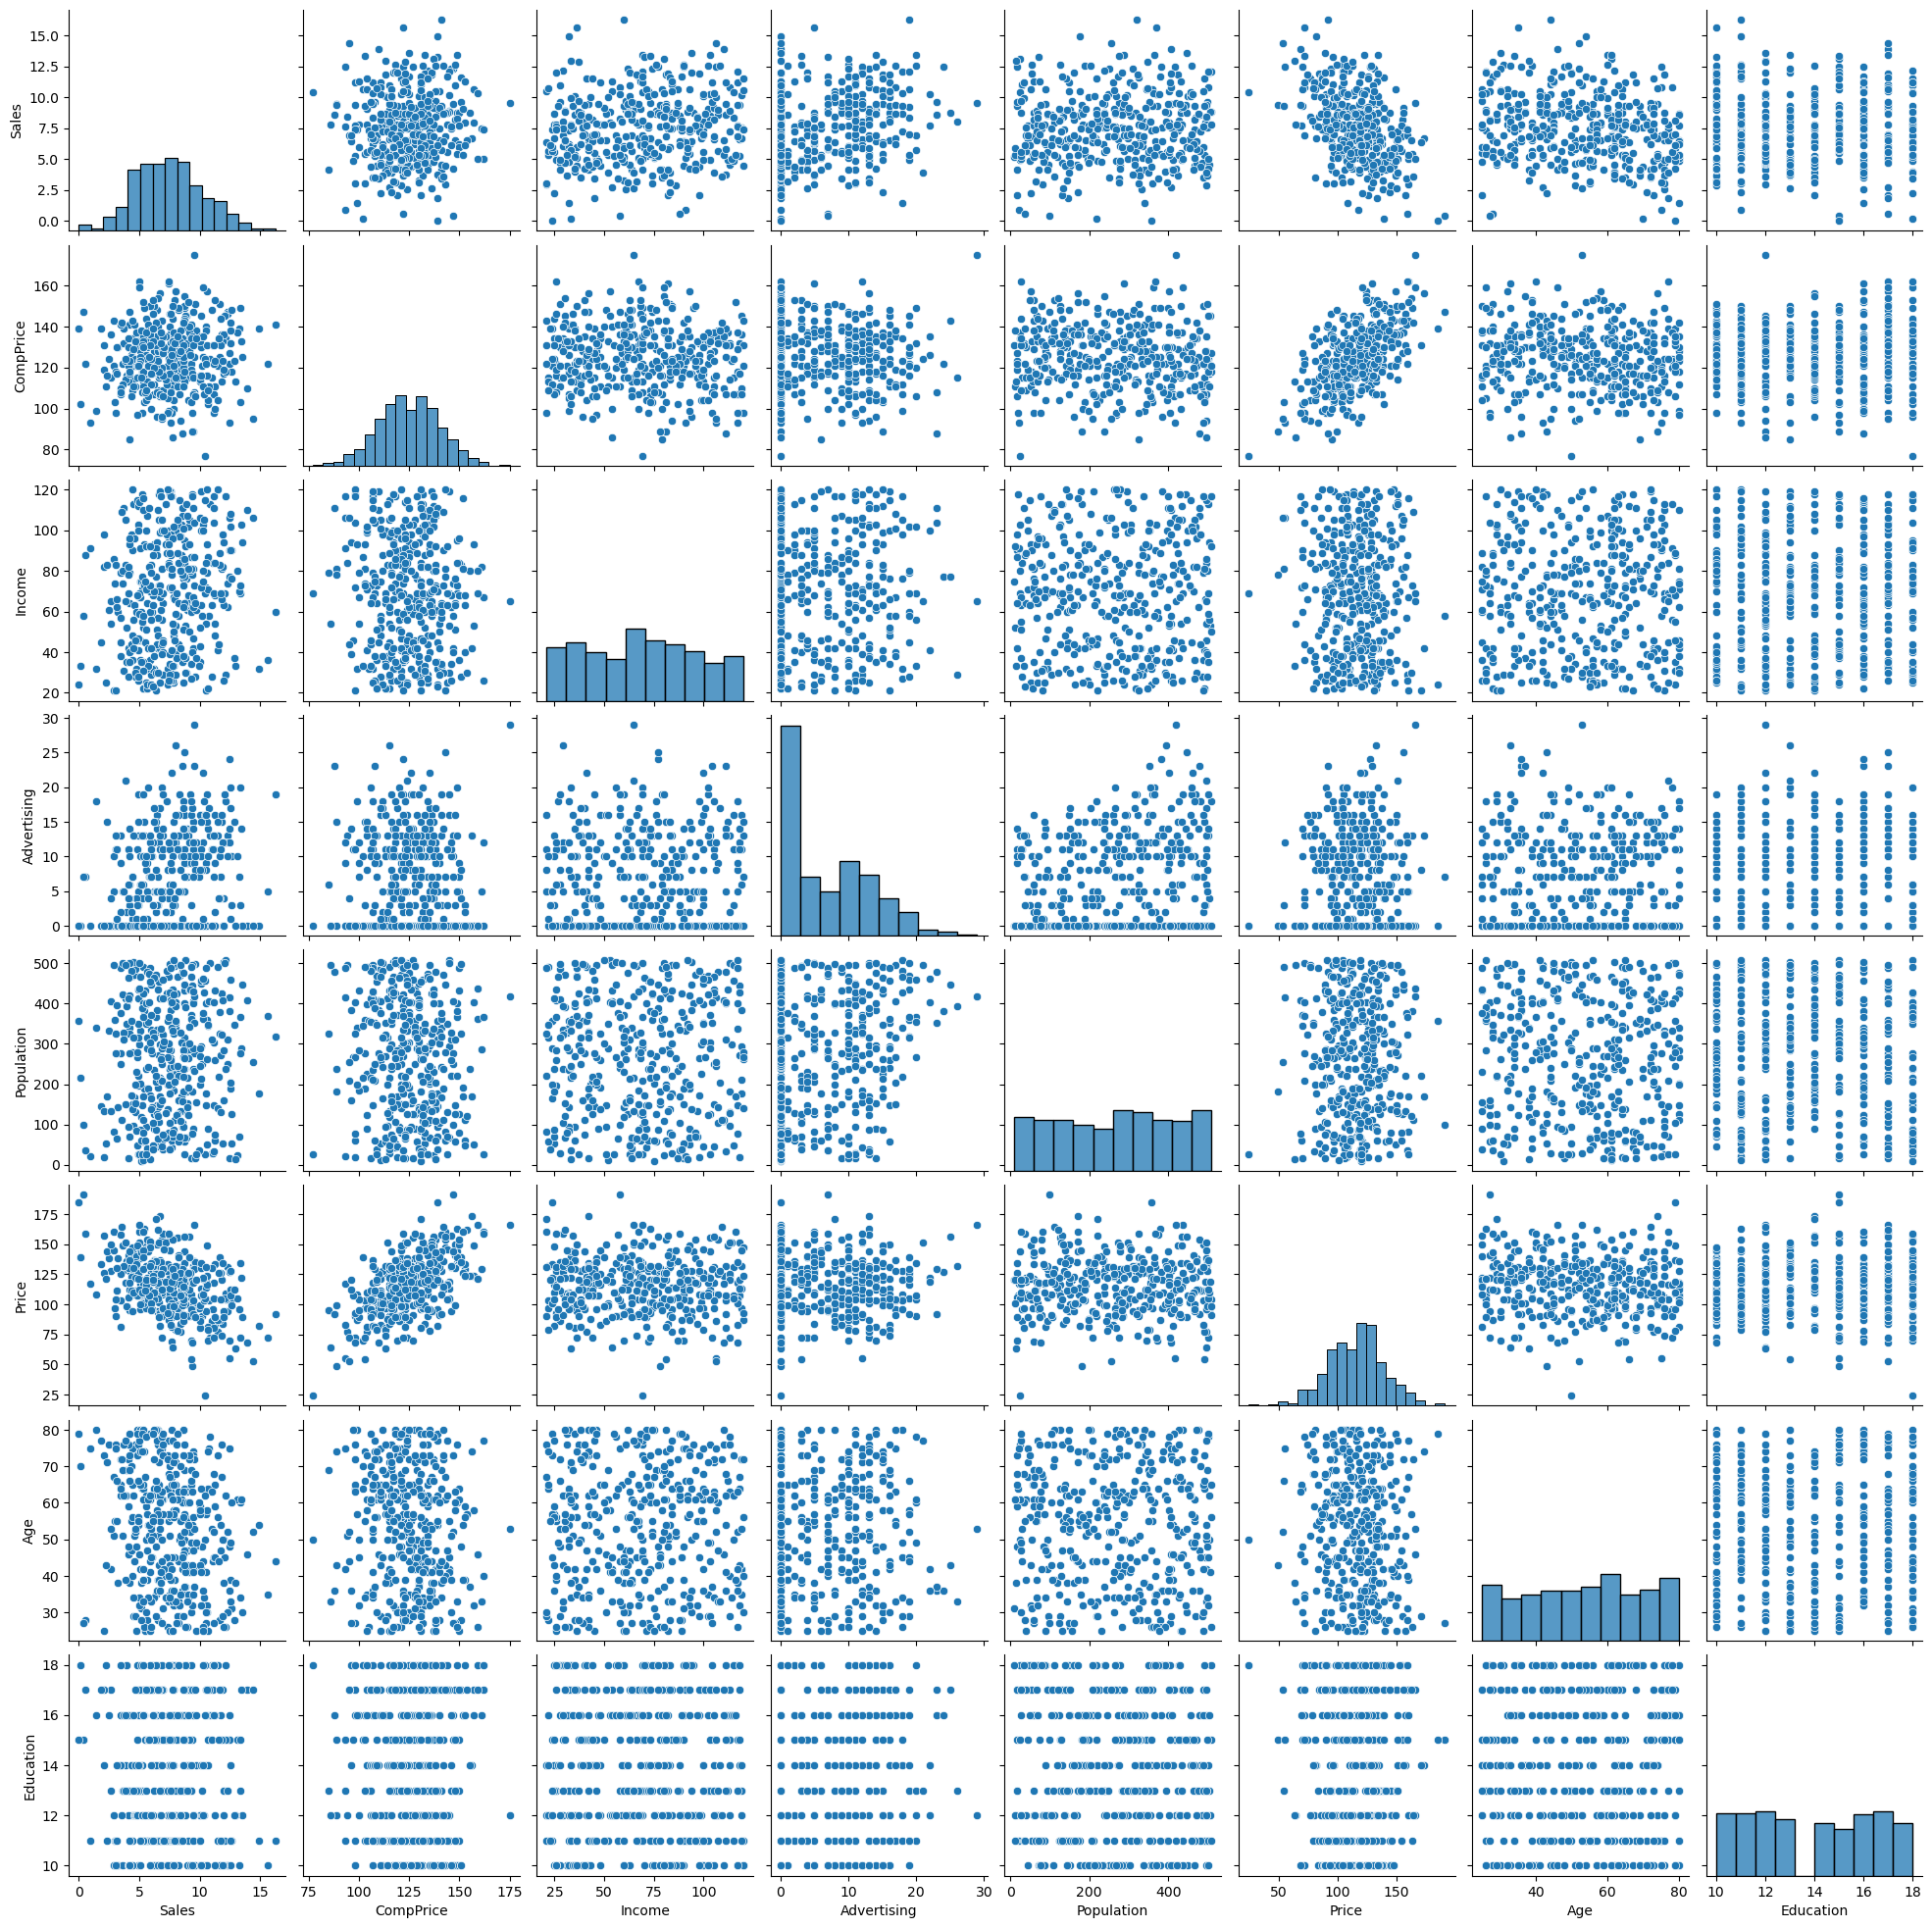

In [118]:
sns.pairplot(carseats)

C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


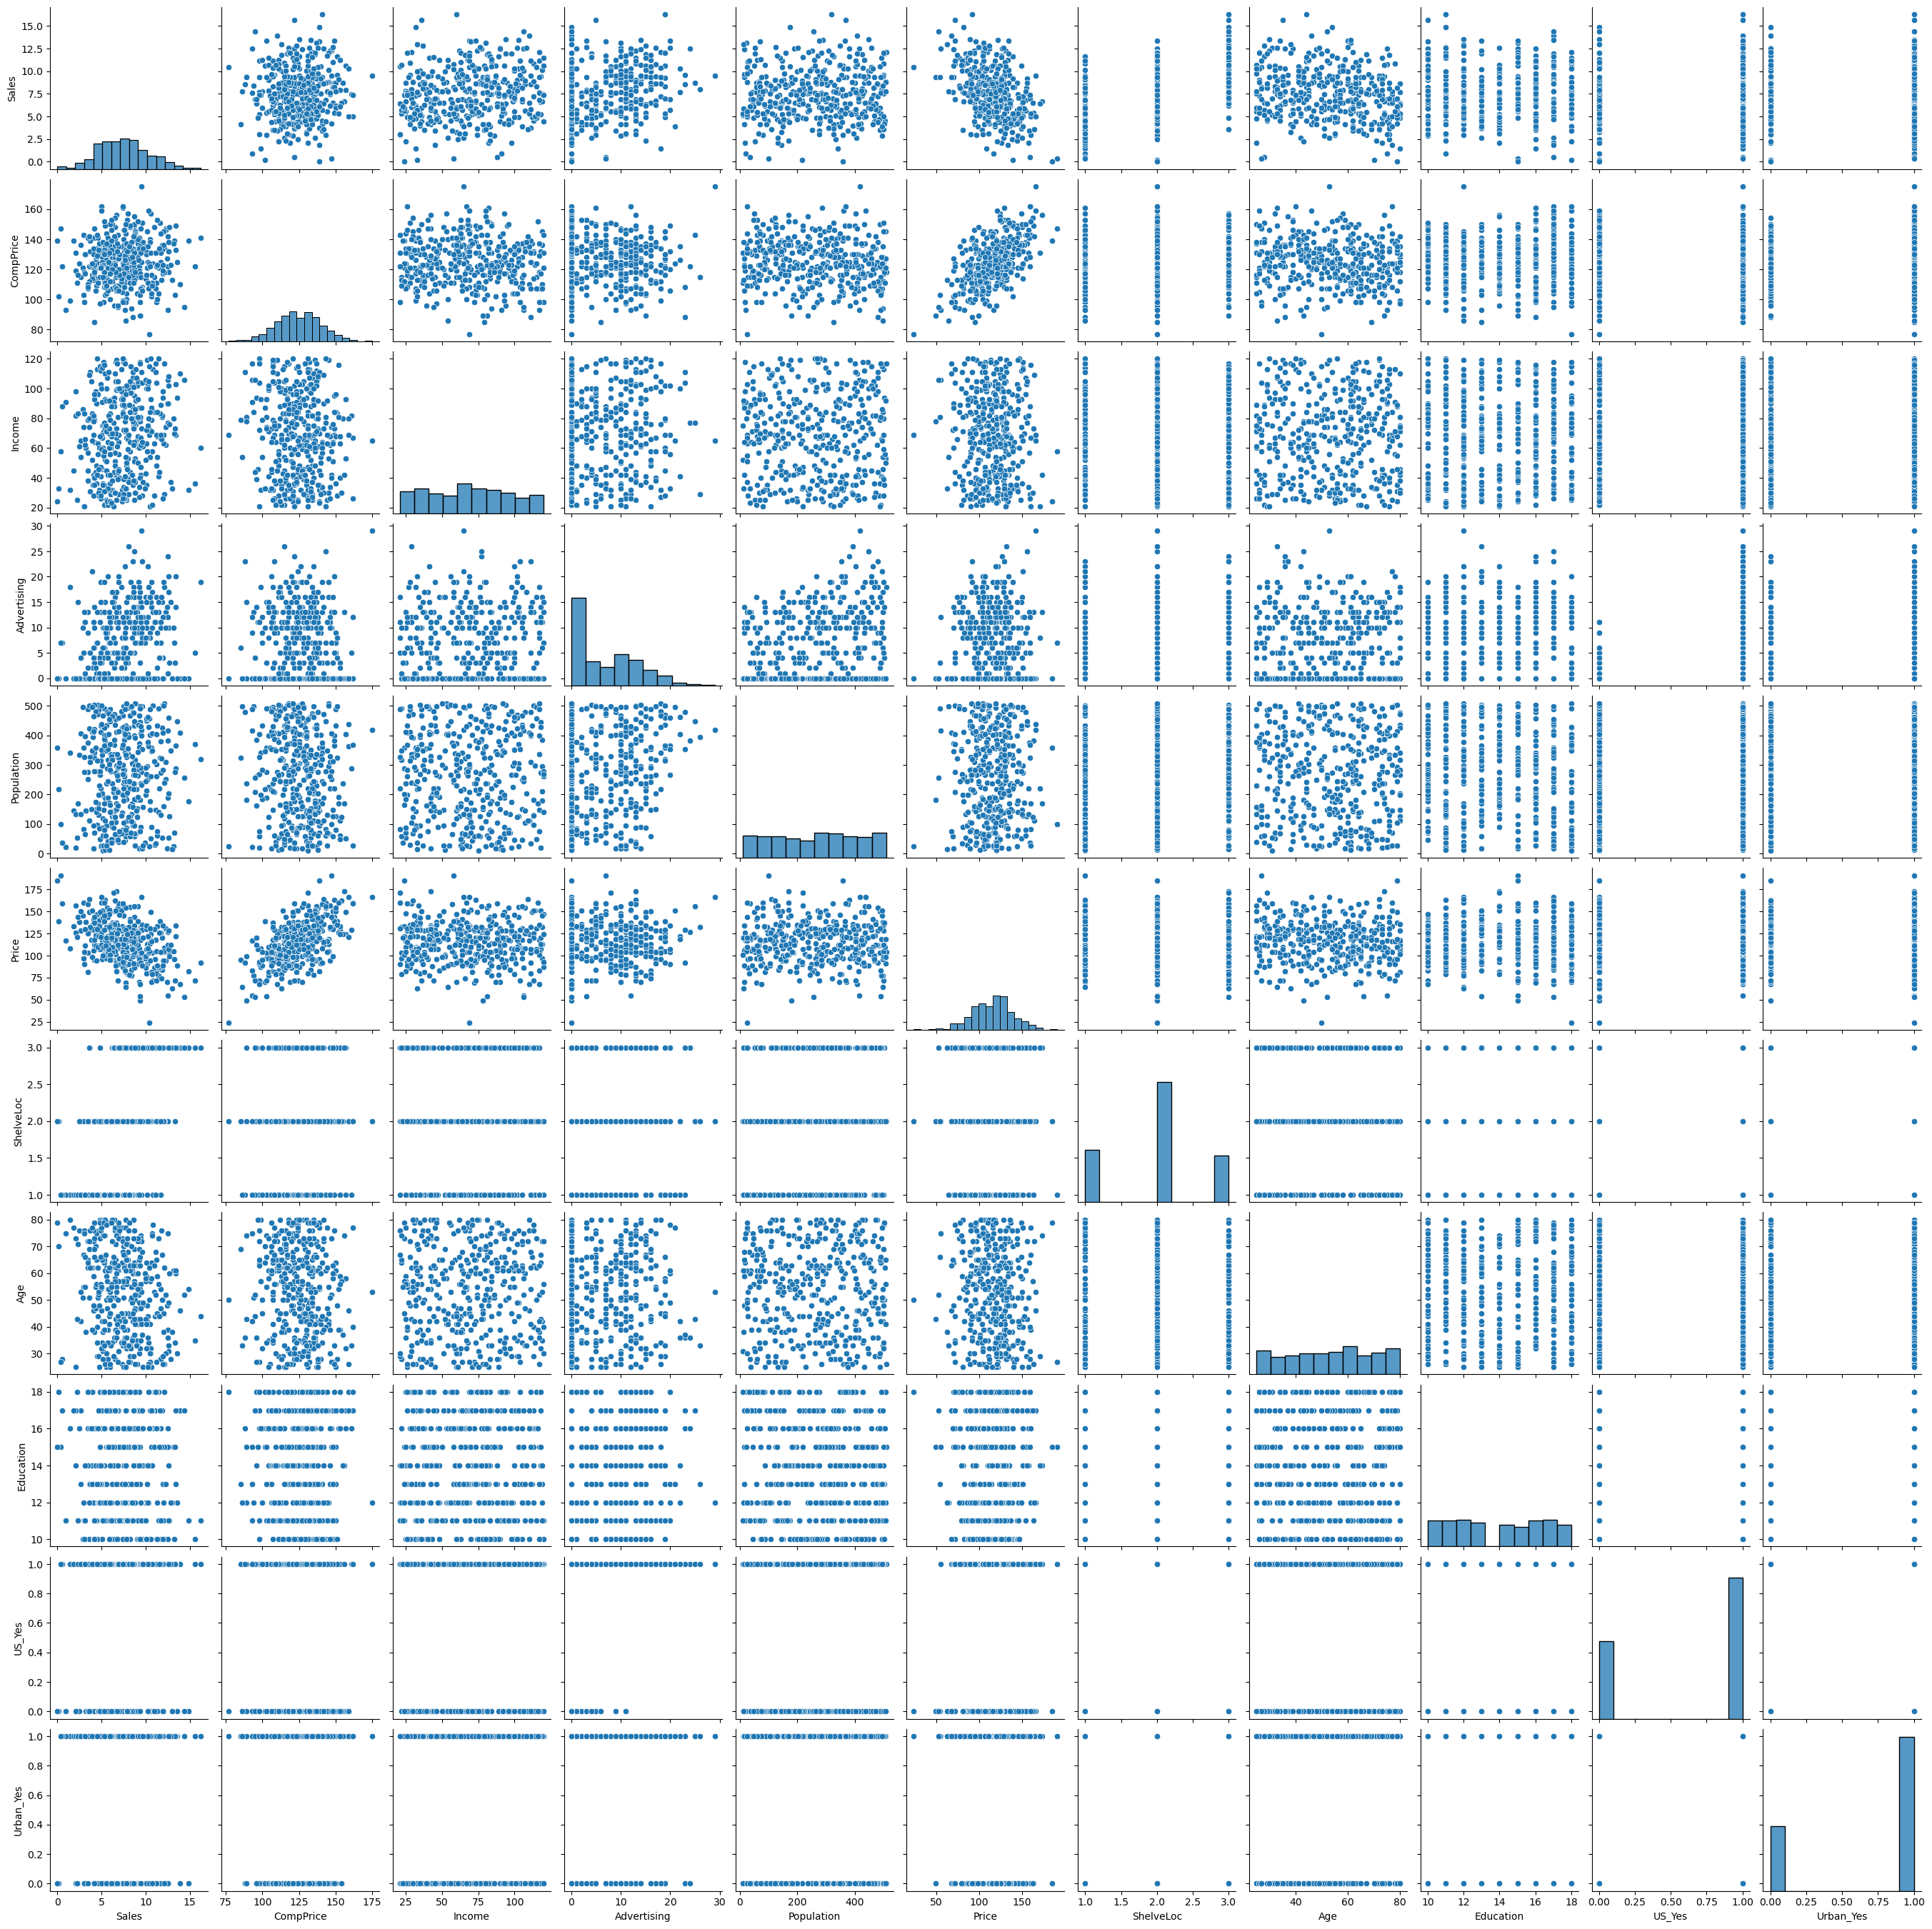

In [119]:
#sns.pairplot(carseats_encoded)

<Axes: >

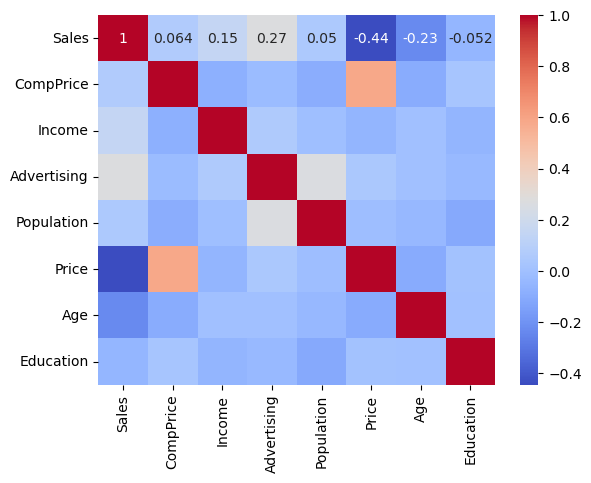

In [120]:
sns.heatmap(carseats.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [121]:
carseats.corr(numeric_only=True).round(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.00,0.06,0.15,0.27,0.05,-0.44,-0.23,-0.05
CompPrice,0.06,1.00,-0.08,-0.02,-0.09,0.58,-0.10,0.03
Income,0.15,-0.08,1.00,0.06,-0.01,-0.06,-0.00,-0.06
Advertising,0.27,-0.02,0.06,1.00,0.27,0.04,-0.00,-0.03
Population,0.05,-0.09,-0.01,0.27,1.00,-0.01,-0.04,-0.11
Price,-0.44,0.58,-0.06,0.04,-0.01,1.00,-0.10,0.01
Age,-0.23,-0.10,-0.00,-0.00,-0.04,-0.10,1.00,0.01
Education,-0.05,0.03,-0.06,-0.03,-0.11,0.01,0.01,1.00


## Einfluss kategorialer Variablen auf `Sales`

Wir analysieren die Zielgröße im Vergleich zu den Gruppen von `ShelveLoc`, `Urban` und `US`.

<Axes: xlabel='ShelveLoc', ylabel='Sales'>

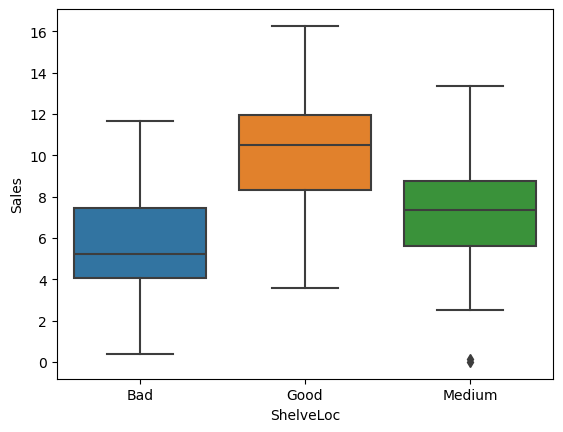

In [122]:
sns.boxplot(x='ShelveLoc', y='Sales', data=carseats)

<Axes: xlabel='Urban', ylabel='Sales'>

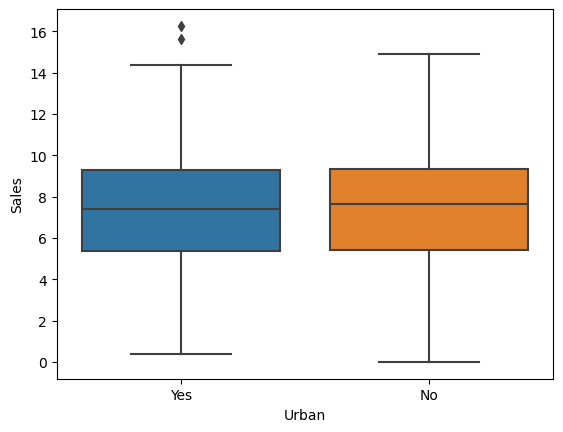

In [123]:
sns.boxplot(x='Urban', y='Sales', data=carseats)

<Axes: xlabel='US', ylabel='Sales'>

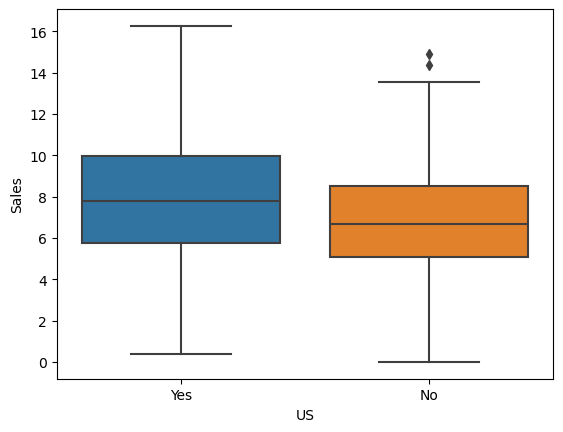

In [124]:
sns.boxplot(x='US', y='Sales', data=carseats)

# Lineare Regression mit dem Carseats-Datensatz

Wir untersuchen, wie sich `Sales` durch `Price`, `Income` und `Education` vorhersagen lässt.  
Dazu nutzen wir drei verschiedene Ansätze in Python:

1. Formelbasierte Regression mit `statsmodels.formula.api`
2. Matrixbasierte Regression mit `statsmodels.api`
3. Klassische Regression mit `sklearn.linear_model`

## Zielmodell:  
`Sales ~ Price + Income + Education`

## 1. Formelbasierte Regression mit `statsmodels.formula.api`

In [95]:
import statsmodels.formula.api as smf

In [96]:
# Daten einlesen
carseats = pd.read_csv("Carseats.csv")

In [97]:
# Formelbasierte Regression mit statsmodels
model = smf.ols('Sales ~ Price + Income + Education', data=carseats).fit()

In [98]:
# Ausgabe der Ergebnisse
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 06 May 2025   Prob (F-statistic):           9.64e-21
Time:                        01:19:58   Log-Likelihood:                -933.77
No. Observations:                 400   AIC:                             1876.
Df Residuals:                     396   BIC:                             1892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2673      0.987     13.443      0.0

#### Formelbasierte Regression mit `statsmodels.formula.api`

Dieser Ansatz ist besonders leserlich: Wir schreiben das Modell als Formel.  
Auch kategoriale Variablen würden automatisch erkannt und dummy-kodiert.


## 2. Matrixbasierte Regression mit `statsmodels.api`

In [99]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

In [100]:
# X und y manuell definieren
X = carseats[['Price', 'Income', 'Education']]
X = add_constant(X)  # Intercept hinzufügen
y = carseats['Sales']

In [101]:
# Modell fitten
model2 = sm.OLS(y, X).fit()

In [102]:
# Ausgabe der Ergebnisse
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 06 May 2025   Prob (F-statistic):           9.64e-21
Time:                        01:20:02   Log-Likelihood:                -933.77
No. Observations:                 400   AIC:                             1876.
Df Residuals:                     396   BIC:                             1892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2673      0.987     13.443      0.0

#### Matrixbasierte Regression mit `statsmodels.api`

Hier bauen wir die Regressionsmatrix (`X`) explizit selbst auf – inklusive Konstante (`add_constant`).  
Diese Methode eignet sich besonders, wenn du mit numerischen Matrizen arbeitest, z. B. nach Feature-Engineering, PCA oder wenn du später deine Matrizen manuell manipulieren möchtest.

Die Funktionalität entspricht der formelbasierten Variante – der Hauptunterschied liegt im Datenhandling.

## 3. Klassische Regression mit `sklearn.linear_model`

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
# X und y definieren
X = carseats[['Price', 'Income', 'Education']]
y = carseats['Sales']

In [105]:
# Modell fitten
model3 = LinearRegression()
model3.fit(X, y)

LinearRegression()

In [106]:
print("Intercept:", model3.intercept_)
print("Koeffizienten:", model3.coef_)

Intercept: 13.267313801987441
Koeffizienten: [-0.05217274  0.01260314 -0.04280194]


#### Regression mit `sklearn.linear_model.LinearRegression`

`sklearn` ist ideal für Machine Learning-Pipelines, liefert aber **keine** p-Werte oder Konfidenzintervalle.  
Gut geeignet für Vorhersagezwecke, weniger für statistische Inferenz.

# Konfidenzintervall

## Konfidenzintervall für Regressionskoeffizienten – Was bedeutet das?

### Fragestellung:

Wie unsicher ist unsere Schätzung eines Regressionskoeffizienten?  
Wir wollen nicht nur einen einzelnen Wert angeben, sondern einen Bereich, in dem der wahre Wert mit hoher Wahrscheinlichkeit liegt.

### Definition:

Für einen geschätzten Regressionskoeffizienten $\hat{\beta}$ mit Standardfehler $SE(\hat{\beta})$ ergibt sich das 95%-Konfidenzintervall durch:

$$
\hat{\beta} \pm t_{\alpha/2, \, df} \cdot SE(\hat{\beta})
$$

- $t_{\alpha/2, \, df}$ ist der kritische Wert aus der t-Verteilung (z. B. etwa 2 bei großen Stichproben)
- $df = n - k - 1$ (Freiheitsgrade)

### Interpretation:

Wir sind zu 95 % sicher, dass der wahre Wert des Koeffizienten in diesem Intervall liegt –  
unter der Annahme, dass das Modell korrekt spezifiziert ist.

### Beispiel:

Angenommen:

- $\hat{\beta} = -0.05$
- $SE(\hat{\beta}) = 0.01$
- $t_{0.975, df} = 2.00$

Dann:

$$
[-0.05 - 2 \cdot 0.01, \; -0.05 + 2 \cdot 0.01] = [-0.07, -0.03]
$$

→ Der wahre Effekt liegt mit 95 %-Sicherheit zwischen −0.07 und −0.03

### Zusammenhang zum t-Test:

- Wenn das Intervall die 0 enthält → kein signifikanter Effekt (wie beim t-Test)
- Wenn 0 außerhalb liegt → signifikanter Einfluss

### Merksatz:

Das Konfidenzintervall zeigt, wie präzise eine Schätzung ist.  
Je enger das Intervall, desto verlässlicher ist die Aussage.

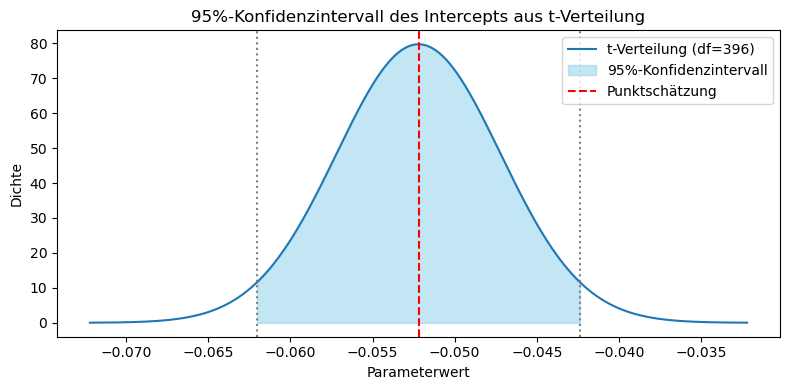

t-Wert (0.975, df=396): 1.9660
95%-Konfidenzintervall: [-0.062, -0.042]


In [41]:
from scipy.stats import t

# Modellparameter laut Regressionsergebnis
mu = -0.0522     # Punktschätzung
se = 0.005       # Standardfehler
n = 400
k = 3
df = n - k - 1   # Freiheitsgrade = 396

# Kritischer t-Wert für 95%-CI
t_crit = t.ppf(0.975, df)
ci_low = mu - t_crit * se
ci_high = mu + t_crit * se

# x-Werte zur Darstellung der Verteilung
x = np.linspace(mu - 4*se, mu + 4*se, 500)
y = t.pdf((x - mu) / se, df) / se  # Skalierte t-Verteilung um mu mit Breite se

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f't-Verteilung (df={df})')
plt.fill_between(x, y, where=(x >= ci_low) & (x <= ci_high), color='skyblue', alpha=0.5, label='95%-Konfidenzintervall')
plt.axvline(mu, color='red', linestyle='--', label='Punktschätzung')
plt.axvline(ci_low, color='gray', linestyle=':')
plt.axvline(ci_high, color='gray', linestyle=':')

# Achsen und Legende
plt.title('95%-Konfidenzintervall des Intercepts aus t-Verteilung')
plt.xlabel('Parameterwert')
plt.ylabel('Dichte')
plt.legend()
plt.tight_layout()
plt.show()

# Ausgabe zur Kontrolle
print(f"t-Wert (0.975, df={df}): {t_crit:.4f}")
print(f"95%-Konfidenzintervall: [{ci_low:.3f}, {ci_high:.3f}]")


# t Tests

## t-Test für Regressionskoeffizienten – Was wird geprüft?

### Fragestellung:

Hat ein einzelner Prädiktor (z. B. Preis, Einkommen, etc.) einen **signifikanten Einfluss** auf die Zielgröße?  
Oder könnte der beobachtete Effekt auch durch Zufall entstanden sein?

### Null- und Alternativhypothese:

Für einen einzelnen Regressionskoeffizienten $\beta_j$ gilt:

- Nullhypothese:  
  $H_0: \beta_j = 0$  
  (kein Einfluss)

- Alternativhypothese:  
  $H_1: \beta_j \neq 0$  
  (es gibt einen Effekt)

### Teststatistik:

Die t-Statistik ergibt sich aus:

$$
t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}
$$

- $\hat{\beta}_j$: geschätzter Regressionskoeffizient  
- $SE(\hat{\beta}_j)$: Standardfehler der Schätzung  
- Verteilung: t-Verteilung mit $df = n - k - 1$ Freiheitsgraden

### Entscheidung:

- Vergleiche den Betrag des t-Werts mit dem kritischen Wert der t-Verteilung  
- Oder verwende den p-Wert:

  - **p < 0.05** → Effekt ist signifikant (wir verwerfen $H_0$)  
  - **p ≥ 0.05** → kein signifikanter Effekt (wir behalten $H_0$ bei)

### Zusammenhang zum Konfidenzintervall:

- Wenn der Wert 0 **innerhalb** des 95 %-Konfidenzintervalls liegt → t-Test **nicht signifikant**  
- Wenn 0 **außerhalb** liegt → t-Test **signifikant**

### Merksatz:

Der t-Test prüft, ob ein einzelner Prädiktor einen echten Effekt hat –  
also ob der geschätzte Koeffizient **deutlich verschieden von 0** ist.

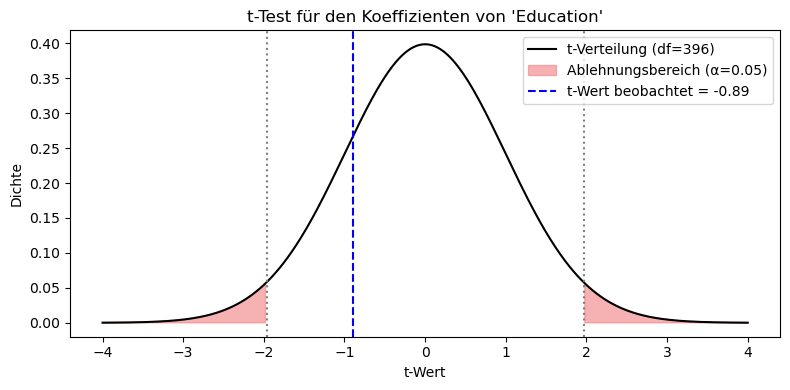

t-Wert: -0.892
Kritischer Wert: ±1.966
p-Wert: 0.373


In [44]:
# Parameter für Education
beta_hat = -0.0428  # Punktschätzer
se = 0.048          # Standardfehler
n = 400
k = 3
df = n - k - 1      # Freiheitsgrade

# t-Wert der Schätzung
t_obs = beta_hat / se

# Kritischer Bereich (zweiseitig, 95 %)
t_crit = t.ppf(0.975, df)

# t-Verteilung unter H0 (d.h. Mittelwert = 0)
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f't-Verteilung (df={df})', color='black')
plt.fill_between(x, y, where=(x <= -t_crit) | (x >= t_crit), color='lightcoral', alpha=0.6, label='Ablehnungsbereich (α=0.05)')
plt.axvline(t_obs, color='blue', linestyle='--', label=f"t-Wert beobachtet = {t_obs:.2f}")
plt.axvline(-t_crit, color='gray', linestyle=':')
plt.axvline(t_crit, color='gray', linestyle=':')

# Beschriftung
plt.title("t-Test für den Koeffizienten von 'Education'")
plt.xlabel("t-Wert")
plt.ylabel("Dichte")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: p-Wert ausgeben
from scipy.stats import ttest_1samp
p_value = 2 * t.sf(abs(t_obs), df)
print(f"t-Wert: {t_obs:.3f}")
print(f"Kritischer Wert: ±{t_crit:.3f}")
print(f"p-Wert: {p_value:.3f}")


# F-Test

## Der F-Test in der linearen Regression – Was wird geprüft?

### Fragestellung:

**Hilft unser Regressionsmodell wirklich bei der Vorhersage?**  
Oder könnten wir genauso gut einfach den Mittelwert als Vorhersage nehmen?

### Die Nullhypothese:

$$
H_0: \beta_1 = \beta_2 = \dots = \beta_k = 0
$$

→ Kein einziger Regressor hat einen Einfluss auf die Zielgröße  
→ Das Modell erklärt **nicht mehr** als ein Modell ohne Prädiktoren

### Die Alternativhypothese:

$$
H_1: \text{Mindestens ein } \beta_j \neq 0
$$

→ Das Modell erklärt signifikant mehr als nur der Mittelwert

### Idee des Tests:

Wir vergleichen:
- **erklärte Varianz** (durch das Modell)
- **nicht erklärte Varianz** (Fehler)

### Berechnung über Quadratsummen:

$$
F = \frac{MS_{\text{Modell}}}{MS_{\text{Fehler}}} = \frac{\frac{SSR}{k}}{\frac{SSE}{n - k - 1}}
$$

- $SSR$ = Regression Sum of Squares (erklärte Varianz)  
- $SSE$ = Error Sum of Squares (Residuen)  
- $k$ = Anzahl Regressoren (ohne Intercept)  
- $n$ = Stichprobengröße

### Alternative Formel über $R^2$:

Die F-Statistik lässt sich auch direkt über den Bestimmtheitsmaß $R^2$ berechnen:

$$
F = \frac{R^2 / k}{(1 - R^2) / (n - k - 1)}
$$

- $R^2$: Anteil erklärter Varianz
- $k$: Anzahl Regressoren (ohne Intercept)
- $n$: Stichprobengröße

### Beispiel mit Modellwerten:

Aus dem Modell-Output:

- $R^2 = 0.216$  
- $n = 400$  
- $k = 3$

Einsetzen ergibt:

$$
F = \frac{0.216 / 3}{(1 - 0.216) / (400 - 3 - 1)} = \frac{0.072}{0.784 / 396} \approx 36.30
$$

### Interpretation:

- **Großer F-Wert** → Das Modell erklärt **viel mehr** als nur der Mittelwert  
- **Kleiner p-Wert** → Wir **verwerfen $H_0$** → Das Modell erklärt **insgesamt signifikant** einen Teil der Varianz in der Zielgröße.

### Merksatz:

> Der F-Test prüft, ob unser Modell **insgesamt etwas bringt** –  
> also ob es sich lohnt, überhaupt Regressoren einzubeziehen.

### Wichtig:

- Der **t-Test** prüft **einzelne Regressoren**
- Der F-Test prüft, ob **mindestens ein** Prädiktor statistisch signifikant zur Vorhersage beiträgt.

→ Beide Tests beantworten unterschiedliche Fragen!

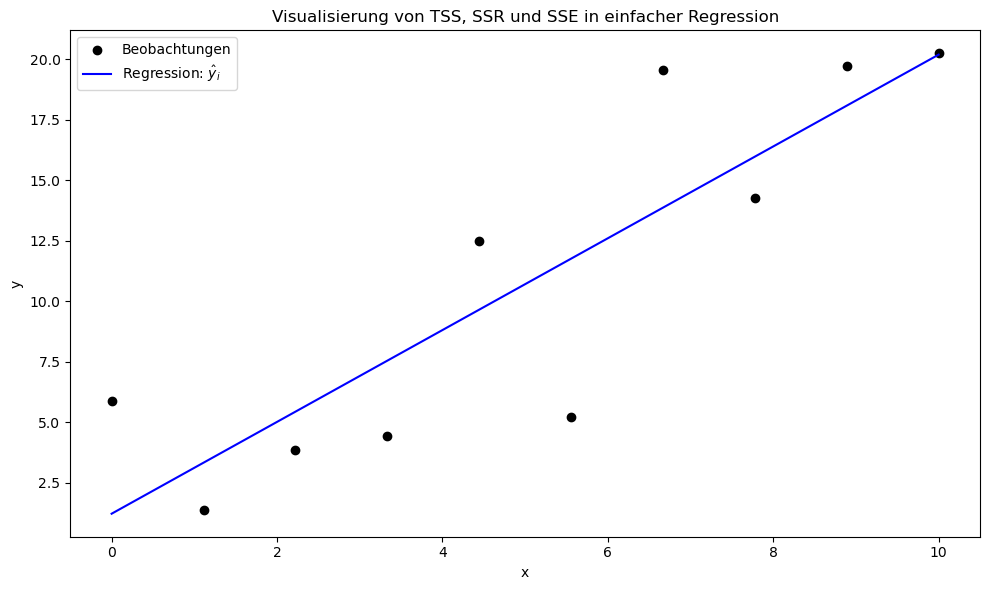

In [57]:
from sklearn.linear_model import LinearRegression

# Beispiel-Daten
np.random.seed(1)
x = np.linspace(0, 10, 10)
y = 2 * x + 1 + np.random.normal(0, 3, size=len(x))  # Lineare Beziehung mit Rauschen

# Modell anpassen
model = LinearRegression()
X = x.reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)

# Mittelwert von y
y_mean = np.mean(y)

# Plot vorbereiten
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Beobachtungen')
plt.plot(x, y_pred, color='blue', label=r'Regression: $\hat{y}_i$')
#plt.axhline(y_mean, color='gray', linestyle='--', label=r'Mittelwert: $\overline{y}$')

# Quadratsummen visualisieren
#for i in range(len(x)):
    # TSS: y_i - y_mean
    #plt.plot([x[i], x[i]], [y[i], y_mean], color='orange', linestyle=':', label='TSS' if i == 0 else "")
    
    # SSR: y_hat_i - y_mean
    #plt.plot([x[i], x[i]], [y_pred[i], y_mean], color='green', linestyle='--', label='SSR' if i == 0 else "")
    
    # SSE: y_i - y_hat_i
    #plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='red', linestyle='-', label='SSE' if i == 0 else "")

# Legende, Titel, Achsen
plt.title('Visualisierung von TSS, SSR und SSE in einfacher Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


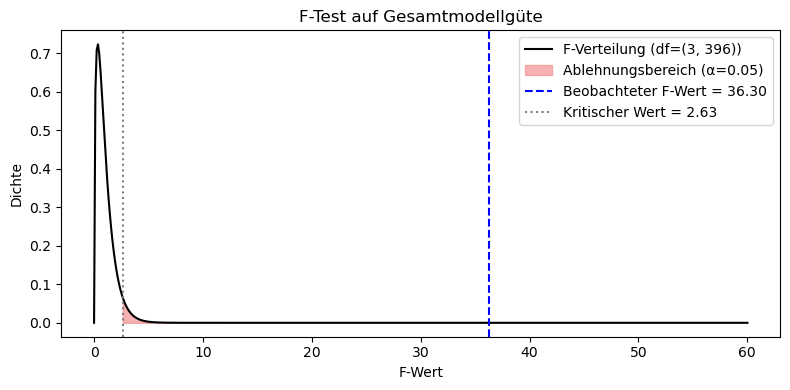

Kritischer F-Wert (α=0.05): 2.627
Beobachteter F-Wert: 36.300
p-Wert: 1.110e-16


In [58]:
from scipy.stats import f

# Gegebene Werte
f_stat = 36.30
df_model = 3
df_resid = 396

# F-Verteilung mit df=(3, 396)
x = np.linspace(0, 60, 500)
y = f.pdf(x, df_model, df_resid)

# Kritischer F-Wert für alpha=0.05
f_crit = f.ppf(0.95, df_model, df_resid)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f'F-Verteilung (df=({df_model}, {df_resid}))', color='black')
plt.fill_between(x, y, where=(x >= f_crit), color='lightcoral', alpha=0.6, label='Ablehnungsbereich (α=0.05)')
plt.axvline(f_stat, color='blue', linestyle='--', label=f'Beobachteter F-Wert = {f_stat:.2f}')
plt.axvline(f_crit, color='gray', linestyle=':', label=f'Kritischer Wert = {f_crit:.2f}')

# Beschriftung
plt.title('F-Test auf Gesamtmodellgüte')
plt.xlabel('F-Wert')
plt.ylabel('Dichte')
plt.legend()
plt.tight_layout()
plt.show()

# Ausgabe p-Wert
from scipy.stats import f as f_dist
p_value = 1 - f.cdf(f_stat, df_model, df_resid)
print(f"Kritischer F-Wert (α=0.05): {f_crit:.3f}")
print(f"Beobachteter F-Wert: {f_stat:.3f}")
print(f"p-Wert: {p_value:.3e}")

# Schritt für Schritt

# Lineare Regression: t-Test Schritt für Schritt

Wir wollen untersuchen, ob bestimmte Einflussgrößen (z. B. `Price`, `Income`, `Education`) einen signifikanten Einfluss auf die Verkaufszahlen (`Sales`) haben.

Dazu führen wir eine lineare Regression durch und berechnen die t-Werte für die geschätzten Regressionskoeffizienten **von Hand** anhand eines kleinen Beispiels (5 Beobachtungen).

## Modellformulierung

Wir betrachten das lineare Modell:

$$
\text{Sales}_i = \beta_0 + \beta_1 \cdot \text{Price}_i + \beta_2 \cdot \text{Income}_i + \beta_3 \cdot \text{Education}_i + \varepsilon_i
$$

In Matrixform:

$$
\mathbf{y} = \mathbf{X} \hat{\boldsymbol{\beta}} + \boldsymbol{\varepsilon}
$$

## Ziel: t-Test für Regressionskoeffizienten

Wir testen, ob ein Koeffizient signifikant von 0 verschieden ist.

### Beispiel: Hypothese für $\beta_1$ (`Price`)
$$
\begin{aligned}
H_0: &\quad \beta_1 = 0 \\
H_1: &\quad \beta_1 \neq 0
\end{aligned}
$$

## t-Wert-Formel

Die Teststatistik lautet:

$$
t_j = \frac{\hat{\beta}_j}{\text{SE}(\hat{\beta}_j)}
$$

Mit:

$$
\text{SE}(\hat{\beta}_j) = \sqrt{\hat{\sigma}^2 \cdot \left[ (\mathbf{X}^\top \mathbf{X})^{-1} \right]_{jj}}
$$

Und:

$$
\hat{\sigma}^2 = \frac{1}{n - k - 1} \sum_{i=1}^n \hat{\varepsilon}_i^2
$$


## Genauer:

### OLS-Schätzung der Regressionskoeffizienten

Für das Regressionsmodell:

$$
\mathbf{y} = \mathbf{X} \hat{\boldsymbol{\beta}} + \boldsymbol{\varepsilon}
$$

gilt die klassische OLS-Schätzformel für die Regressionskoeffizienten:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

### Herleitung der OLS-Schätzformel

Wir wollen die Koeffizienten $\hat{\boldsymbol{\beta}}$ so wählen, dass die Summe der quadratischen Abweichungen (Residuen) minimal wird:

$$
\min_{\boldsymbol{\beta}} \; \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2
$$

In Matrixschreibweise:

$$
\min_{\boldsymbol{\beta}} \; (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})
$$

Das ist eine quadratische Zielfunktion. Wir können sie durch Ableiten und Nullsetzen minimieren:

1. Ableitung nach $\boldsymbol{\beta}$:

$$
\frac{\partial}{\partial \boldsymbol{\beta}} \left[ (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right] = -2 \mathbf{X}^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})
$$

2. Gleichsetzen mit Null:

$$
-2 \mathbf{X}^\top (\mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}}) = 0
$$

3. Umstellen:

$$
\mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{X} \hat{\boldsymbol{\beta}}
$$

4. Lösen nach $\hat{\boldsymbol{\beta}}$ (unter der Voraussetzung, dass $\mathbf{X}^\top \mathbf{X}$ invertierbar ist):

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

Diese Formel ist die sogenannte **Normalengleichung** der linearen Regression.


### Berechnung der Residuen und der Fehler-Varianz

Wenn $\hat{\boldsymbol{\beta}}$ berechnet wurde, erhält man die geschätzten Werte:

$$
\hat{\mathbf{y}} = \mathbf{X} \hat{\boldsymbol{\beta}}
$$

und daraus die Residuen:

$$
\hat{\boldsymbol{\varepsilon}} = \mathbf{y} - \hat{\mathbf{y}} = \mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}}
$$

Die geschätzte Fehler-Varianz (Residualvarianz) lautet:

$$
\hat{\sigma}^2 = \frac{1}{n - k - 1} \sum_{i=1}^{n} \hat{\varepsilon}_i^2
$$

Dabei ist:
- $n$: Anzahl der Beobachtungen  
- $k$: Anzahl der erklärenden Variablen (ohne Intercept)

### Herleitung der geschätzten Fehler-Varianz

In der linearen Regression gehen wir davon aus, dass die Fehler $ \varepsilon_i $ eine konstante Varianz haben:

$$
\varepsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

Da wir $ \sigma^2 $ **nicht kennen**, schätzen wir sie durch die sogenannte **Residualvarianz**:

$$
\hat{\sigma}^2 = \frac{1}{n - k - 1} \sum_{i=1}^{n} \hat{\varepsilon}_i^2
$$

#### Warum \( n - k - 1 \)?

- \( n \): Anzahl der Beobachtungen  
- \( k \): Anzahl der erklärenden Variablen (ohne Intercept)  
- \( k + 1 \): Anzahl der geschätzten Parameter (inkl. Intercept)

Wenn wir Parameter schätzen, **verlieren wir Freiheitsgrade**. Für jedes geschätzte $ \beta_j $ wird ein Freiheitsgrad verbraucht.

Deshalb korrigieren wir den Nenner:

$$
\text{Anzahl der Freiheitsgrade für die Residuen} = n - (k + 1)
$$

#### Warum quadrieren wir die Residuen?

Weil positive und negative Abweichungen sich sonst gegenseitig aufheben würden. Die Summe der quadrierten Residuen ist die sogenannte **Residual Sum of Squares (RSS)**:

$$
\text{RSS} = \sum_{i=1}^{n} \hat{\varepsilon}_i^2
$$

Die Schätzung von $ \sigma^2 $ basiert dann auf dem Mittelwert dieser quadrierten Residuen, **unter Berücksichtigung der verlorenen Freiheitsgrade**:

$$
\hat{\sigma}^2 = \frac{\text{RSS}}{n - k - 1}
$$

### Standardfehler der Regressionskoeffizienten

Die Varianz-Kovarianzmatrix der geschätzten Koeffizienten lautet:

$$
\text{Var}(\hat{\boldsymbol{\beta}}) = \hat{\sigma}^2 \cdot (\mathbf{X}^\top \mathbf{X})^{-1}
$$

Die **Standardfehler** der einzelnen Koeffizienten stehen auf der Diagonalen dieser Matrix:

$$
\text{SE}(\hat{\beta}_j) = \sqrt{ \left[ \text{Var}(\hat{\boldsymbol{\beta}}) \right]_{jj} }
$$

Diese Standardfehler werden für die **t-Tests** benötigt:

$$
t_j = \frac{\hat{\beta}_j}{\text{SE}(\hat{\beta}_j)}
$$

## Vorgehen

Wir verwenden die ersten 5 Zeilen des `Carseats`-Datensatzes. Schritt für Schritt:

1. Designmatrix $\mathbf{X}$ aufbauen (mit Intercept)
2. $\hat{\boldsymbol{\beta}}$ berechnen
3. Residuen $ \hat{\varepsilon} $ berechnen
4. Fehler-Varianz $ \hat{\sigma}^2 $
5. Standardfehler und t-Werte berechnen
6. Interpretation der Ergebnisse

In [60]:
# Nur ein kleiner Teil von Carseats für Rechendemo (z. B. 5 Zeilen)
carseats_small = carseats[['Sales', 'Price', 'Income', 'Education']].head(5)

In [61]:
carseats_small

,Sales,Price,Income,Education
0,9.50,120,73,17
1,11.22,83,48,10
2,10.06,80,35,12
3,7.40,97,100,14
4,4.15,128,64,13


In [62]:
# Designmatrix X (mit Intercept) und Zielvariable y vorbereiten
X = add_constant(carseats_small[['Price', 'Income', 'Education']]).values
y = carseats_small['Sales'].values.reshape(-1, 1)

In [63]:
X

array([[  1., 120.,  73.,  17.],
       [  1.,  83.,  48.,  10.],
       [  1.,  80.,  35.,  12.],
       [  1.,  97., 100.,  14.],
       [  1., 128.,  64.,  13.]])

In [64]:
y

array([[ 9.5 ],
       [11.22],
       [10.06],
       [ 7.4 ],
       [ 4.15]])

In [65]:
# Schritt 1: Regressionskoeffizienten berechnen
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ y
beta_hat = XtX_inv @ XtY

### Warum macht die Matrixformel der OLS-Schätzung Sinn?

Die OLS-Formel:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

wählt die Koeffizienten $\hat{\beta}$ so, dass die Vorhersage

$$
\hat{\mathbf{y}} = \mathbf{X} \hat{\boldsymbol{\beta}}
$$

möglichst **nahe an den echten Werten** $\mathbf{y}$ liegt – gemessen an der Summe der quadrierten Abweichungen.

#### Geometrische Intuition:

- Die Spalten von $X$ spannen einen Raum auf.
- Wir suchen die **senkrechte Projektion** von $\mathbf{y}$ auf diesen Raum.
- Die Matrixformel berechnet genau den Punkt $\hat{\boldsymbol{\beta}}$, für den $\mathbf{X} \hat{\boldsymbol{\beta}}$ die Projektion ist.

#### Bedeutung der einzelnen Teile:

- $\mathbf{X}^\top \mathbf{y}$: misst, wie stark $y$ mit jedem Prädiktor zusammenhängt
- $\mathbf{X}^\top \mathbf{X}$: misst, wie stark die Prädiktoren miteinander zusammenhängen
- Inversion: "entmischt" diese Überlagerung
- Ergebnis: der beste Kompromiss an Koeffizienten, um $y$ durch $X$ zu erklären


In [73]:
X.T

array([[  1.,   1.,   1.,   1.,   1.],
       [120.,  83.,  80.,  97., 128.],
       [ 73.,  48.,  35., 100.,  64.],
       [ 17.,  10.,  12.,  14.,  13.]])

In [74]:
XtX

array([[5.0000e+00, 5.0800e+02, 3.2000e+02, 6.6000e+01],
       [5.0800e+02, 5.3482e+04, 3.3436e+04, 6.8520e+03],
       [3.2000e+02, 3.3436e+04, 2.2954e+04, 4.3730e+03],
       [6.6000e+01, 6.8520e+03, 4.3730e+03, 8.9800e+02]])

In [75]:
XtX_inv

array([[ 7.60924359e+00, -2.83592597e-02,  7.60162696e-03,
        -3.79882343e-01],
       [-2.83592597e-02,  9.41529350e-04, -6.29704407e-05,
        -4.79318288e-03],
       [ 7.60162696e-03, -6.29704407e-05,  6.11890963e-04,
        -3.05794332e-03],
       [-3.79882343e-01, -4.79318288e-03, -3.05794332e-03,
         8.04983406e-02]])

In [76]:
XtY

array([[  42.33],
       [4125.06],
       [2589.76],
       [ 551.97]])

In [66]:
beta_hat

array([[15.11836582],
       [-0.12535389],
       [-0.04122221],
       [ 0.66074323]])

In [67]:
# Schritt 2: Residuen und geschätzte Werte
y_hat = X @ beta_hat
residuals = y - y_hat

In [68]:
# Schritt 3: Fehler-Varianz berechnen
n = len(y)
k = X.shape[1] - 1  # ohne Intercept
sigma_squared_hat = (residuals.T @ residuals) / (n - k - 1)

In [69]:
# Schritt 4: Varianz-Kovarianzmatrix und Standardfehler
var_beta_hat = sigma_squared_hat[0, 0] * XtX_inv
std_errors = np.sqrt(np.diag(var_beta_hat)).reshape(-1, 1)

In [70]:
# Schritt 5: t-Werte berechnen
t_values = beta_hat / std_errors

In [71]:
# Zusammenfassung als DataFrame
results = pd.DataFrame(
    np.hstack((beta_hat, std_errors, t_values)),
    columns=['beta_hat', 'SE(beta)', 't-Wert'],
    index=['Intercept', 'Price', 'Income', 'Education']
)

In [72]:
print(results)

            beta_hat  SE(beta)    t-Wert
Intercept  15.118366  8.043043  1.879682
Price      -0.125354  0.089468 -1.401107
Income     -0.041222  0.072125 -0.571537
Education   0.660743  0.827262  0.798711


# Regression mit Polynomtermen

## Polynomiale Regression in Python mit `statsmodels`

### Ziel
Nichtlinearen Zusammenhang (z. B. Sättigungseffekte) modellieren –  
Beispiel: `Sales ~ Price + Price²`

### Daten vorbereiten

In [150]:
# Quadratischer Term ergänzen
carseats_poly = carseats.copy()
carseats_poly['Price_squared'] = carseats_poly['Price'] ** 2

### Modelle schätzen

In [168]:
model_linear = smf.ols('Sales ~ Price', data=carseats_poly).fit()
print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Tue, 06 May 2025   Prob (F-statistic):           7.62e-21
Time:                        01:51:28   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      0.633     21.558      0.0

In [167]:
model_poly = smf.ols('Sales ~ Price + Price_squared', data=carseats_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     49.07
Date:                Tue, 06 May 2025   Prob (F-statistic):           9.01e-20
Time:                        01:51:23   Log-Likelihood:                -938.17
No. Observations:                 400   AIC:                             1882.
Df Residuals:                     397   BIC:                             1894.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.2720      1.931      7.391

### Modelle vergleichen

In [153]:
print("Lineares Modell R²:", round(model_linear.rsquared, 3))
print("Quadratisches Modell R²:", round(model_poly.rsquared, 3))

Lineares Modell R²: 0.198
Quadratisches Modell R²: 0.198


### Visualisierung

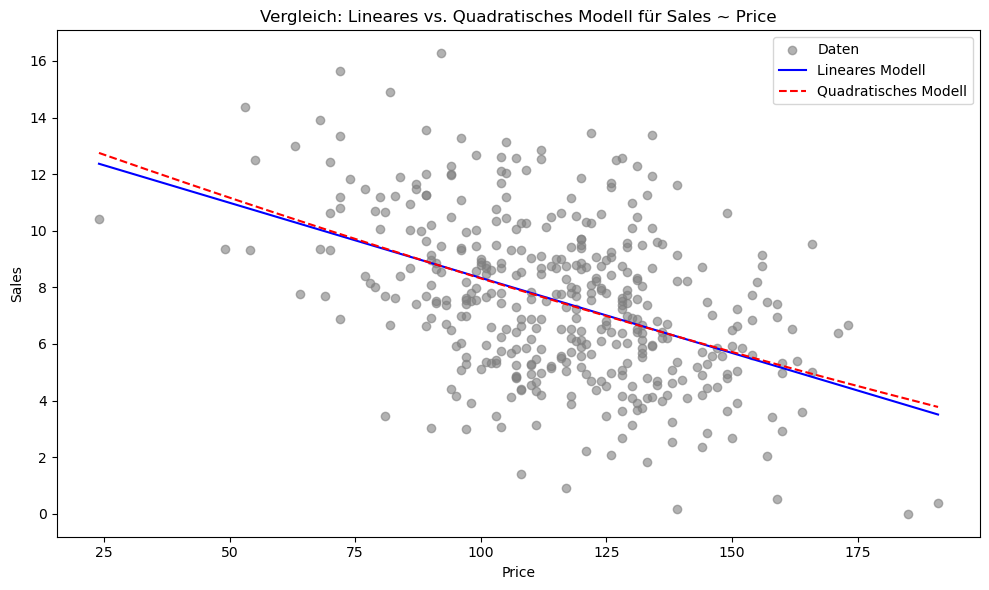

In [166]:
# Wertebereich für Price
x = np.linspace(carseats_poly['Price'].min(), carseats_poly['Price'].max(), 200)

# DataFrames für Vorhersagen
x_df_lin = pd.DataFrame({'Price': x})
x_df_quad = pd.DataFrame({'Price': x, 'Price_squared': x**2})

y_pred_lin = model_lin.predict(x_df_lin)
y_pred_quad = model_quad.predict(x_df_quad)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(carseats_poly['Price'], carseats_poly['Sales'], alpha=0.6, label='Daten', color='gray')
plt.plot(x, y_pred_lin, color='blue', label='Lineares Modell')
plt.plot(x, y_pred_quad, color='red', label='Quadratisches Modell', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Vergleich: Lineares vs. Quadratisches Modell für Sales ~ Price')
plt.legend()
plt.tight_layout()
plt.show()

## Anderer Datensatz

In [169]:
# mpg-Daten laden
mpg = sns.load_dataset("mpg").dropna()  # NaNs entfernen

# Quadratischer Term hinzufügen
mpg['horsepower_squared'] = mpg['horsepower'] ** 2

In [170]:
# Lineares Modell
model_lin = smf.ols("mpg ~ horsepower", data=mpg).fit()

# Quadratisches Modell
model_quad = smf.ols("mpg ~ horsepower + horsepower_squared", data=mpg).fit()

In [171]:
print("Lineares Modell:\n", model_lin.summary())

Lineares Modell:
                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 06 May 2025   Prob (F-statistic):           7.03e-81
Time:                        01:52:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717  

In [172]:
print("\nQuadratisches Modell:\n", model_quad.summary())


Quadratisches Modell:
                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 06 May 2025   Prob (F-statistic):           5.40e-99
Time:                        01:52:12   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept   

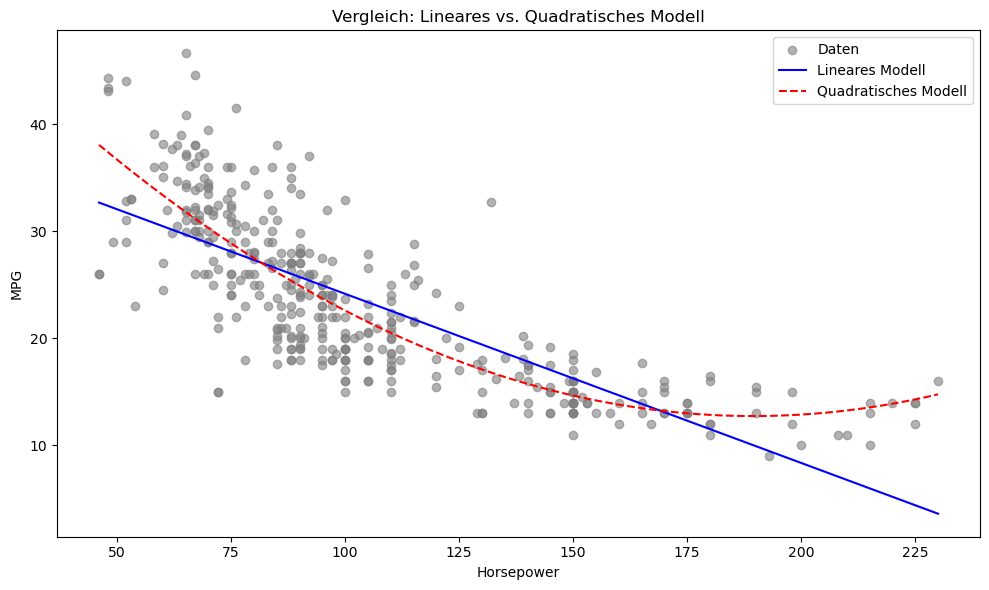

In [173]:
# Wertebereich für Vorhersagekurven
x = np.linspace(mpg['horsepower'].min(), mpg['horsepower'].max(), 200)

# Daten für beide Modellvorhersagen
x_df_lin = pd.DataFrame({'horsepower': x})
x_df_quad = pd.DataFrame({'horsepower': x, 'horsepower_squared': x**2})

y_pred_lin = model_lin.predict(x_df_lin)
y_pred_quad = model_quad.predict(x_df_quad)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(mpg['horsepower'], mpg['mpg'], alpha=0.6, label='Daten', color='gray')
plt.plot(x, y_pred_lin, color='blue', label='Lineares Modell')
plt.plot(x, y_pred_quad, color='red', label='Quadratisches Modell', linestyle='--')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Vergleich: Lineares vs. Quadratisches Modell')
plt.legend()
plt.tight_layout()
plt.show()

In [174]:
# Residuen berechnen
mpg['resid_lin'] = model_lin.resid
mpg['resid_quad'] = model_quad.resid

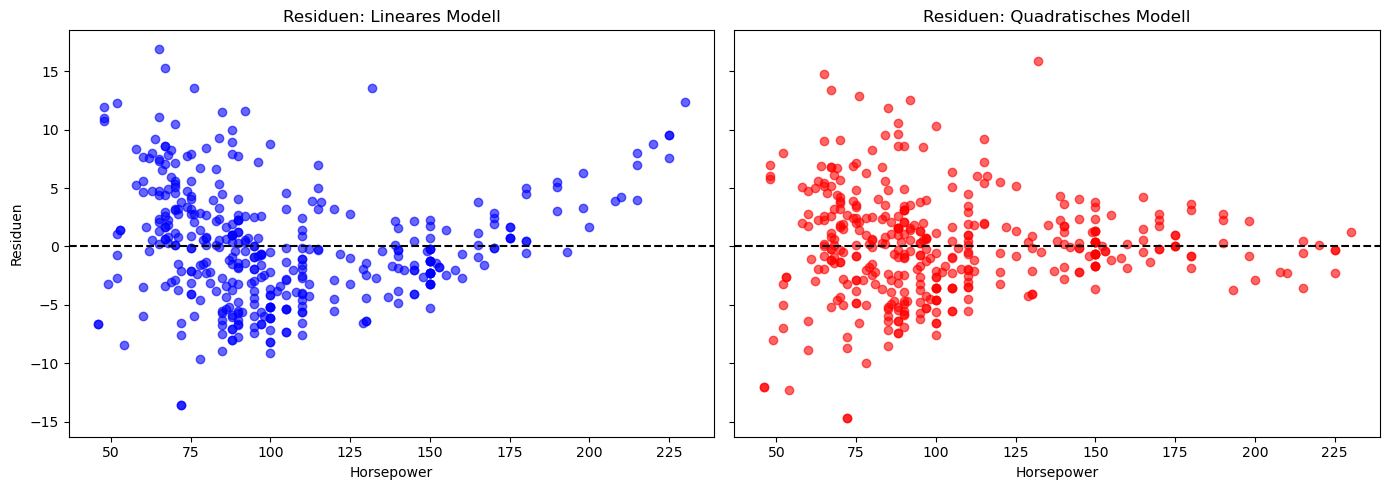

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot für lineares Modell
axes[0].scatter(mpg['horsepower'], mpg['resid_lin'], alpha=0.6, color='blue')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title("Residuen: Lineares Modell")
axes[0].set_xlabel("Horsepower")
axes[0].set_ylabel("Residuen")

# Plot für quadratisches Modell
axes[1].scatter(mpg['horsepower'], mpg['resid_quad'], alpha=0.6, color='red')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title("Residuen: Quadratisches Modell")
axes[1].set_xlabel("Horsepower")

plt.tight_layout()
plt.show()
